# Alpha Ratio method for W+jet estimation (NEW)

> In this notebook I grabed the corrected W+jets from histogram but since this histogram was not contaning the scale to I need to scale it but the scaling method also scales the error bars.

In [1]:
import ROOT as r

## activate the interactive visualisation we can use the JavaScriptROOT magic
#%jsroot on

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

#%matplotlib inline
import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.08/05


<ROOT.TStyle object ("tdrStyle") at 0x5f7faf0>

In [2]:
def createCanvasPads():
    c = r.TCanvas("c", "canvas", 600, 700)
    # Upper histogram plot is pad1
    pad1 = r.TPad("pad1", "pad1", 0.0, 0.3, 1.0, 1.0)
    pad1.SetBottomMargin(0)  # joins upper and lower plot
    pad1.SetLeftMargin(0.1)
    pad1.SetRightMargin(0.03)
    pad1.SetLogy(0)
    pad1.SetGridx()
    pad1.SetTickx(1)
    pad1.SetTicky(1)
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = r.TPad("pad2", "pad2", 0.0, 0.00, 1.0, 0.3)
    #pad2.SetLogy(1)
    pad2.SetTopMargin(0)  # joins upper and lower plot
    pad2.SetBottomMargin(0.25)
    pad2.SetLeftMargin(0.1)
    pad2.SetRightMargin(0.03)
    pad2.SetGridx()
    pad2.SetTickx(1)
    pad2.SetTicky(1)
    pad2.Draw()

    return c, pad1, pad2

In [3]:
def createRatio(h1, h2, xlabel, col):
    h3 = h1.Clone("h3")
    h3.SetLineColor(col)
    h3.SetMarkerColor(col)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.1)
    h3.SetMaximum(2.8)
    # Set up plot for markers and errors
    #h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data/MC")
    y.SetNdivisions(505)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(15)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitle(xlabel)
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(15)

    return h3

In [4]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")

treeIn = fin.Get("otree")

# Define the cuts
cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>125)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>105) &&(PuppiAK8_jet_mass_so_corr<125)) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

## Get W+jet histogram in signal and side-band region

In [5]:
hSignal_4bin = r.TH1D("hSignal_4bin","",4,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(1)

hSignal_15bin = r.TH1D("hSignal_15bin","",15,600,2500)
hSignal_15bin.SetMarkerColor(1)
hSignal_15bin.SetLineColor(1)
hSignal_15bin.SetLineWidth(3)
hSignal_15bin.SetMarkerSize(1)

hSignal_38bin = r.TH1D("hSignal_38bin","",38,600,2500)
hSignal_38bin.SetMarkerColor(1)
hSignal_38bin.SetLineColor(1)
hSignal_38bin.SetLineWidth(3)
hSignal_38bin.SetMarkerSize(1)

hSideBand_15bin = r.TH1D("hSideBand_15bin","",15,600,2500)
hSideBand_15bin.SetMarkerColor(2)
hSideBand_15bin.SetLineColor(2)
hSideBand_15bin.SetLineWidth(3)
hSideBand_15bin.SetMarkerSize(1)

hSideBand_38bin = r.TH1D("hSideBand_38bin","",38,600,2500)
hSideBand_38bin.SetMarkerColor(2)
hSideBand_38bin.SetLineColor(2)
hSideBand_38bin.SetLineWidth(3)
hSideBand_38bin.SetMarkerSize(1)

treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_4bin",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_15bin",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_38bin",cutString_Signal)

treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand_15bin",cutString_SideBand)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand_38bin",cutString_SideBand)

3503L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


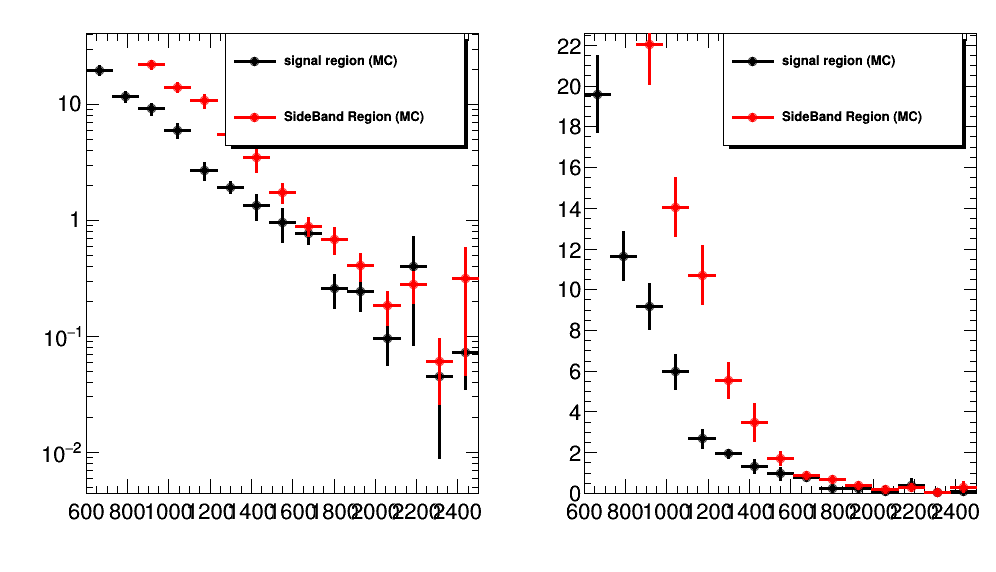

In [6]:
leg = r.TLegend(0.45,0.95,.95,0.75)

leg.AddEntry(hSignal_15bin,"signal region (MC)")
leg.AddEntry(hSideBand_15bin,"SideBand Region (MC)")


c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal_15bin.SetTitle("Log axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()
c1.cd(2)
hSignal_15bin.SetTitle("Linear axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()

c1.Draw()

## Calculate alpha by dividing W+jets MC in signal and side-band region

Alpha does not exists

****************************************
Minimizer is Linear
Chi2                      =      15.1166
NDf                       =           13
p0                        =     0.189752   +/-   0.0574895   
p1                        =  0.000131577   +/-   6.01321e-05 
Integral =  974.895265664
Integral =  748.023631446


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


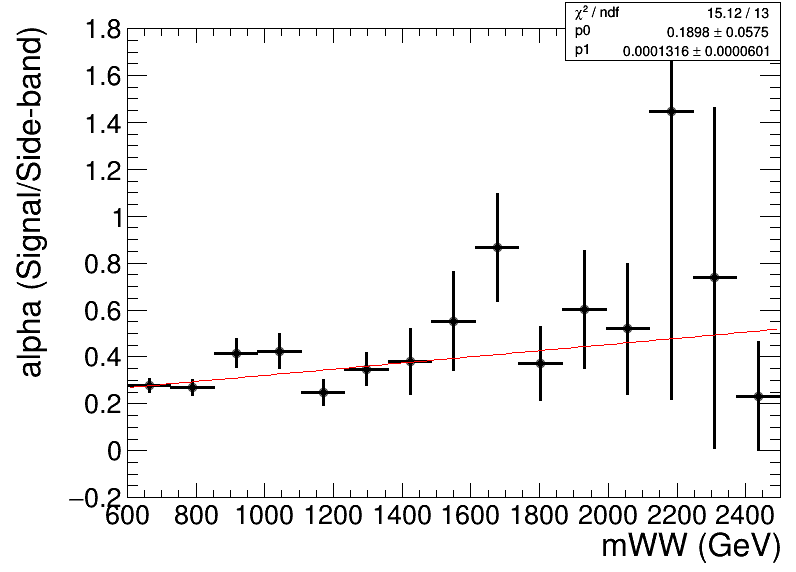

In [7]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",15,600,2500)
Alpha = hSignal_15bin.Clone()
Alpha.Divide(hSideBand_15bin)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha (Signal/Side-band)")
Alpha.SetMaximum(1.8)
Alpha.SetMinimum(-0.2)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

Print alpha values in each bin: 


1 	600 650 => 625.0 0.271987839532
2 	650 700 => 675.0 0.27856669405
3 	700 750 => 725.0 0.285145548569
4 	750 800 => 775.0 0.291724403088
5 	800 850 => 825.0 0.298303257607
6 	850 900 => 875.0 0.304882112126
7 	900 950 => 925.0 0.311460966645
8 	950 1000 => 975.0 0.318039821163
9 	1000 1050 => 1025.0 0.324618675682
10 	1050 1100 => 1075.0 0.331197530201
11 	1100 1150 => 1125.0 0.33777638472
12 	1150 1200 => 1175.0 0.344355239239
13 	1200 1250 => 1225.0 0.350934093757
14 	1250 1300 => 1275.0 0.357512948276
15 	1300 1350 => 1325.0 0.364091802795
16 	1350 1400 => 1375.0 0.370670657314
17 	1400 1450 => 1425.0 0.377249511833
18 	1450 1500 => 1475.0 0.383828366351
19 	1500 1550 => 1525.0 0.39040722087
20 	1550 1600 => 1575.0 0.396986075389
21 	1600 1650 => 1625.0 0.403564929908
22 	1650 1700 => 1675.0 0.410143784427
23 	1700 1750 => 1725.0 0.416722638945
24 	1750 1800 => 1775.0 0.423301493464
25 	1800 1850 => 1825.0 0.429880347983
26 	1850 1900 => 1875.0 0

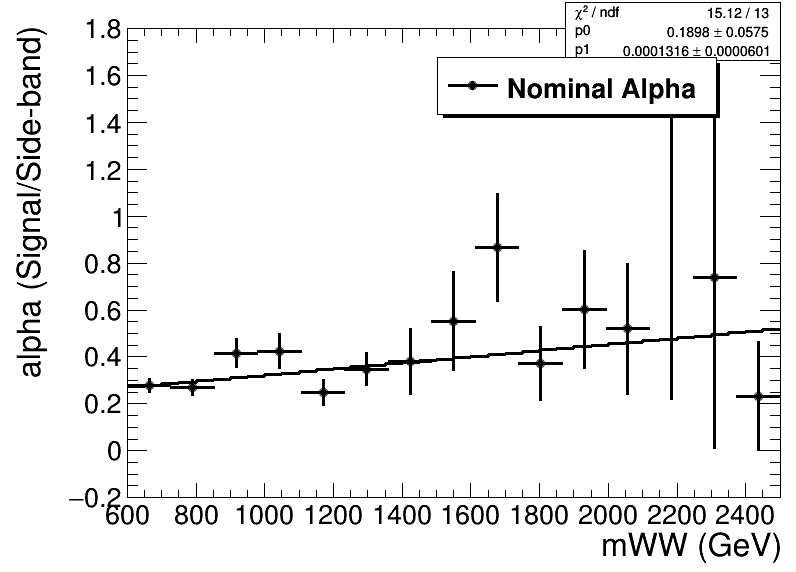

In [8]:
leg = r.TLegend(0.55,0.9,.9,0.8)

hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
print "Print alpha values in each bin: \n\n"
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(1)


leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

# Get corrected W+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

In [ ]:
leg.Clear()
c1.Clear()
Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_04_16_11h24_BothLSBUSB_ClosureTest/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")

Wjet_hist = r.TH1F()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist.SetMarkerColor(625)
Wjet_hist.SetLineColor(625)
Wjet_hist.SetFillColor(625)
Wjet_hist.SetLineWidth(3)
Wjet_hist.SetMarkerSize(1)


Wjet_hist.Scale(193.75)
print Wjet_hist.Integral()
Wjet_hist.SetMaximum(45.0)
Wjet_hist.Draw("hist")
hSideBand.Draw("same")
leg.AddEntry(Wjet_hist,"SideBand Region (Corr)")
leg.AddEntry(hSideBand,"SideBand Region (MC)")
leg.Draw()
c1.Draw()

print "bin 1 content = ",Wjet_hist.GetBinContent(1)
print "bin 2 content = ",Wjet_hist.GetBinContent(2)
print "bin 3 content = ",Wjet_hist.GetBinContent(3)
print "bin 4 content = ",Wjet_hist.GetBinContent(4)

In [ ]:
c1.SetLogy()
c1.Draw()

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

In [ ]:
c1.Clear()
leg.Clear()
c1.SetLogy(0)

hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(4)
hModel_Sig.SetLineColor(4)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))


hModel_Sig.Draw()
hSignal.Draw("same")
leg.AddEntry(hSignal,"W+jet Signal Region (MC)")
leg.AddEntry(hModel_Sig,"W+jet Signal Region (Alpha)")

leg.Draw()

c1.Draw()

In [ ]:
c1.SetLogy()
c1.Draw()

In [ ]:
# For 4 bins
hModel_Sig_new = r.TH1F("hModel_Sig_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig.GetBinContent(i)
    bin[count] += hModel_Sig.GetBinContent(i)

hModel_Sig_new.SetBinContent(1,bin[1])
hModel_Sig_new.SetBinContent(2,bin[2])
hModel_Sig_new.SetBinContent(3,bin[3])
hModel_Sig_new.SetBinContent(4,bin[4])

hModel_Sig_new.SetMarkerColor(1)
hModel_Sig_new.SetLineColor(1)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

In [ ]:
c1.Clear()
fin_Wjet_MC = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_Wjet_MC = fin_Wjet_MC.Get("otree")
treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

# Signal Region Distribution (105-125)

In [ ]:
# for 4 bins
hModel_Sig_new.SetMarkerColor(625)
hModel_Sig_new.SetLineColor(625)
hModel_Sig_new.SetFillColor(625)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

hVV_Sig = r.TH1D("hVV_Sig","",4,600,2500)
hVV_Sig.SetMarkerColor(607)
hVV_Sig.SetLineColor(607)
hVV_Sig.SetFillColor(607)
hVV_Sig.SetLineWidth(3)
hVV_Sig.SetMarkerSize(1)

hTTbar_Sig = r.TH1D("hTTbar_Sig","",4,600,2500)
hTTbar_Sig.SetMarkerColor(592)
hTTbar_Sig.SetLineColor(592)
hTTbar_Sig.SetFillColor(592)
hTTbar_Sig.SetLineWidth(3)
hTTbar_Sig.SetMarkerSize(1)

hSTop_Sig = r.TH1D("hSTop_Sig","",4,600,2500)
hSTop_Sig.SetMarkerColor(854)
hSTop_Sig.SetLineColor(854)
hSTop_Sig.SetFillColor(854)
hSTop_Sig.SetLineWidth(3)
hSTop_Sig.SetMarkerSize(1)

hData_Sig = r.TH1D("hData_Sig","",4,600,2500)
hData_Sig.SetMarkerColor(1)
hData_Sig.SetLineColor(1)
#hData.SetFillColor(1)
hData_Sig.SetLineWidth(3)
hData_Sig.SetMarkerSize(1)

treeIn_VV.Draw("mass_lvj_type0_PuppiAK8>>hVV_Sig",cutString_Signal)
treeIn_TTbar.Draw("mass_lvj_type0_PuppiAK8>>hTTbar_Sig",cutString_Signal)
treeIn_STop.Draw("mass_lvj_type0_PuppiAK8>>hSTop_Sig",cutString_Signal)

# Define the cuts
cutString_SideBand_Data   =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so>40) && (PuppiAK8_jet_mass_so<65)) || ((PuppiAK8_jet_mass_so>125) && (PuppiAK8_jet_mass_so<150)))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SigData         =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so>105) && (PuppiAK8_jet_mass_so<125)))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"


treeIn_Data.Draw("mass_lvj_type0_PuppiAK8>>hData_Sig",cutString_SigData)

In [ ]:
# 4 bins
leg = r.TLegend(0.45,0.95,.95,0.75)

stack = r.THStack()

stack.Add(hSTop_Sig,"F")
hAdd = hSTop_Sig.Clone("hAdd")

stack.Add(hTTbar_Sig,"F")
hAdd.Add(hTTbar_Sig)

stack.Add(hVV_Sig,"F")
hAdd.Add(hVV_Sig)

stack.Add(hModel_Sig_new,"F")
hAdd.Add(hModel_Sig_new)

#stack.Add(newHist,"F")

leg.AddEntry(hSTop_Sig,"STop")
leg.AddEntry(hTTbar_Sig,"TTbar")
leg.AddEntry(hVV_Sig,"Diboson")
leg.AddEntry(hModel_Sig_new,"Wjets")
#leg.AddEntry(hModel_Sig,"Wjets")
leg.AddEntry(hData_Sig,"Data")



#stack.SetMinimum(0.001)
#stack.SetMaximum(20.0)
stack.SetMaximum(100.0)

stack.Draw("hist")
hData_Sig.Draw("same hist")
leg.Draw()

In [ ]:
c1,p1,p2 = createCanvasPads()

hRatio = createRatio(hData_Sig,hAdd, "M_{ww}", 1)

p1.cd()
hData_Sig.Sumw2()
stack.Draw("hist")
hData_Sig.Draw("same")
p2.cd()
#hRatio.SetMaximum(2.8)
#hRatio.SetMinimum(0.1)
hRatio.Draw()
line1 = r.TLine(600,0.5,2500,0.5);
line1.SetLineColor(1);
line1.SetLineStyle(2);
line1.Draw();
line2 = r.TLine(600,1,2500,1);
line2.SetLineColor(1);
line2.SetLineStyle(2);
line2.Draw();
line3 = r.TLine(600,1.5,2500,1.5);
line3.SetLineColor(1);
line3.SetLineStyle(2);
line3.Draw();
c1.Draw()

In [ ]:
print "Program done...."